In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("metrics.csv")
print(df.shape)
print(df.columns)
df.sample(2)

(24, 20)
Index(['run_name', 'test_file', 'arc_num_params', 'arc_num_conv',
       'arc_pool_mode', 'arc_up_mode', 'arc_addition', 'arc_skip',
       'train_loss', 'valid_loss', 'test_loss', 'valid_F1', 'train_F1',
       'test_F1', 'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')


,run_name,test_file,arc_num_params,arc_num_conv,arc_pool_mode,arc_up_mode,arc_addition,arc_skip,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
12,unet-4-8-8-8-8-nc-1-pool-max-up-transpose-skip...,test_0.csv,2256,1,max,transpose,sum,1,0.009258,0.012899,0.009779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
23,unet-4-8-8-8-8-pool-max-up-upsample-skip0,test_0.csv,3236,2,max,upsample,sum,0,0.140393,0.135116,0.142135,0.739949,0.733621,0.723747,0.802814,0.813188,0.802473,0.0,0.0,0.0


In [26]:
import plotly.express as px
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


hue = "arc_num_conv"
xplot = "arc_num_params"
yplot = "test_Accuracy"

extra_info = [
    "test_file",
    "arc_num_params",
    "arc_num_conv",
    "arc_pool_mode",
    "arc_up_mode",
    "arc_addition",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info
)
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"])

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num Params", showlegend=True)

fig.show()

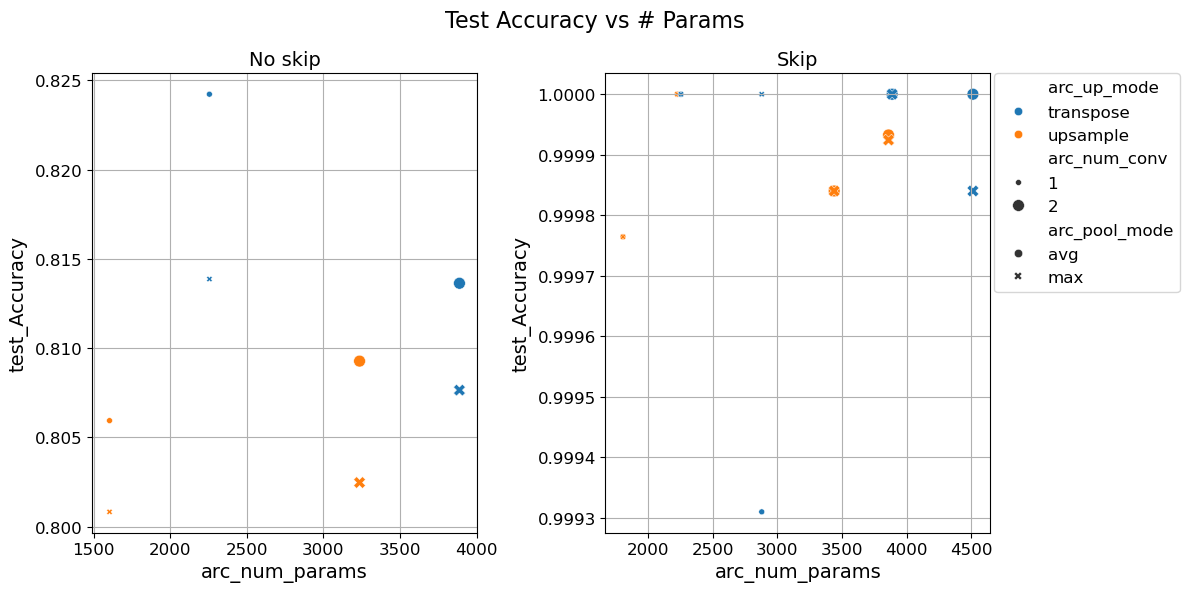

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

hue = "arc_up_mode"
xplot = "arc_num_params"
yplot = "test_Accuracy"
style = "arc_pool_mode"
size = "arc_num_conv"

extra_info = [
    "test_file",
    "arc_num_params",
    "arc_num_conv",
    "arc_pool_mode",
    "arc_up_mode",
    "arc_addition",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")
 
sns.scatterplot(
    data=df0, x=xplot, y=yplot, hue=hue, style=style, ax=ax[0], size=size, legend=False
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, style=style, size=size, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['run_name', 'train_file', 'arc_features', 'arc_num_params',
       'arc_latent_volume', 'arc_skip', 'train_loss', 'valid_loss',
       'test_loss', 'valid_F1', 'train_F1', 'test_F1', 'train_Accuracy',
       'valid_Accuracy', 'test_Accuracy', 'train_Accuracy_seq',
       'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')

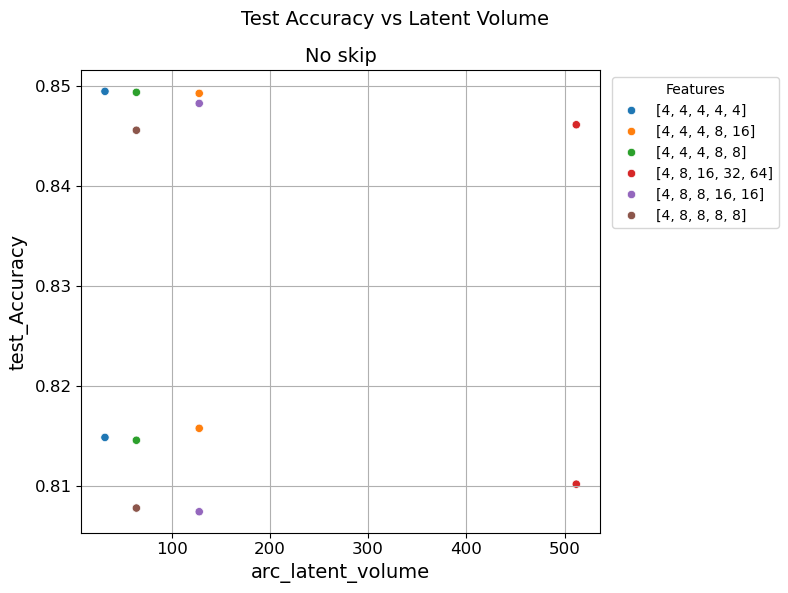

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_features"
xplot = "arc_latent_volume"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax)

ax.grid()
ax.set_xlabel(a.get_xlabel(), fontsize=14)
ax.set_ylabel(a.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs Latent Volume", fontsize=14)
ax.set_title("No skip", fontsize=14)
ax.legend(
    title="Features",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()

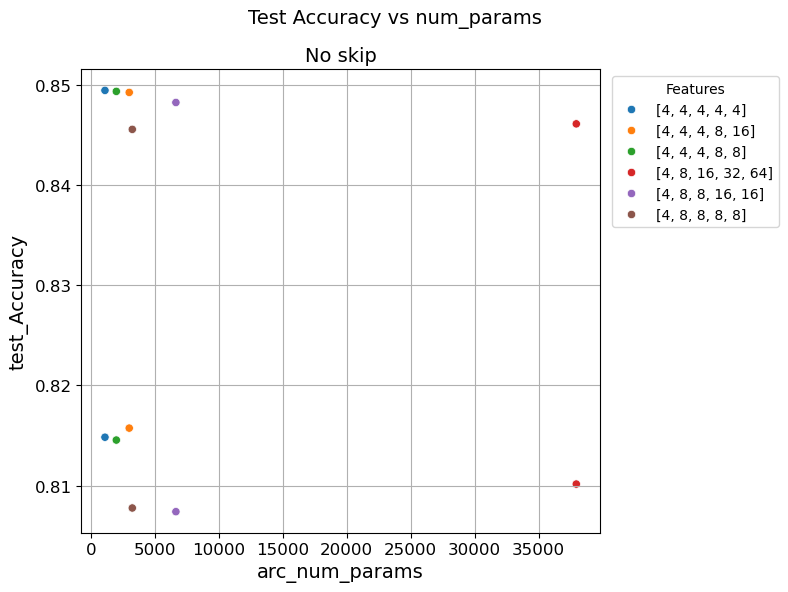

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_features"
xplot = "arc_num_params"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax)

ax.grid()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs num_params", fontsize=14)
ax.set_title("No skip", fontsize=14)
ax.legend(
    title="Features",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()